In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
""" 
This analyses explore user activity between March and May 2025, 
the goal is to understand how users interact with different models, license and featuers and to identify patterns in usage
"""

original_df = pd.read_csv("da_internship_task_dataset.csv")

df = original_df.copy()
df.info()
df.head()

""" 
The dataset contains 120k rows and 7 columns. No missing values.
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122746 entries, 0 to 122745
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   uuid          122746 non-null  object 
 1   day_id        122746 non-null  object 
 2   license       122746 non-null  object 
 3   model         122746 non-null  object 
 4   feature       122746 non-null  object 
 5   requests_cnt  122746 non-null  float64
 6   spent_amount  122746 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.6+ MB


' \nThe dataset contains 120k rows and 7 columns. No missing values.\n'

In [40]:
df['day_id'] = pd.to_datetime(df['day_id']) #convert to datetime object
df['month'] = df['day_id'].dt.month_name()      # 'March', 'April', 'May'
df['day_of_week'] = df['day_id'].dt.day_name()  # 'Monday', 'Tuesday', ...


In [41]:
avg_requests_by_month = (
    df.groupby('month')
      .apply(lambda x: x.groupby('uuid')['requests_cnt'].sum().mean())
      .reset_index(name='avg_requests_per_user')
)

print(avg_requests_by_month)

   month  avg_requests_per_user
0  April            1255.470696
1  March            1146.668041
2    May            1377.246781


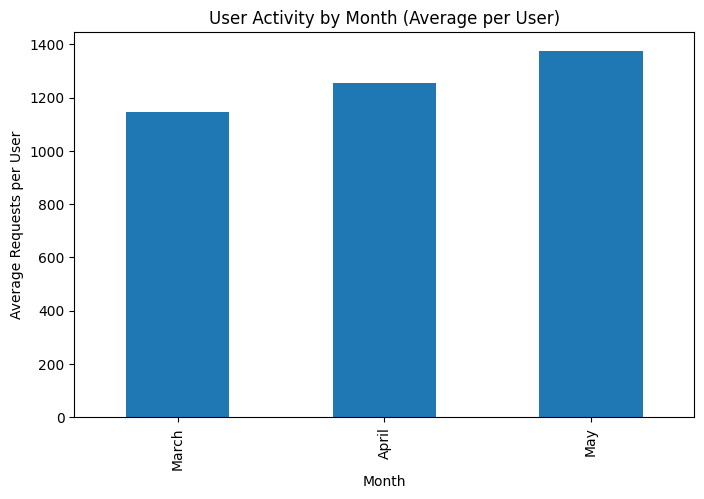

In [42]:
month_order = ['March', 'April', 'May']
avg_requests_by_month['month'] = pd.Categorical(avg_requests_by_month['month'], categories=month_order, ordered=True)
avg_requests_by_month = avg_requests_by_month.sort_values('month')

avg_requests_by_month.plot(
    x='month', y='avg_requests_per_user', kind='bar', figsize=(8,5), legend=False
)
plt.title("User Activity by Month (Average per User)")
plt.ylabel("Average Requests per User")
plt.xlabel("Month")
plt.show()

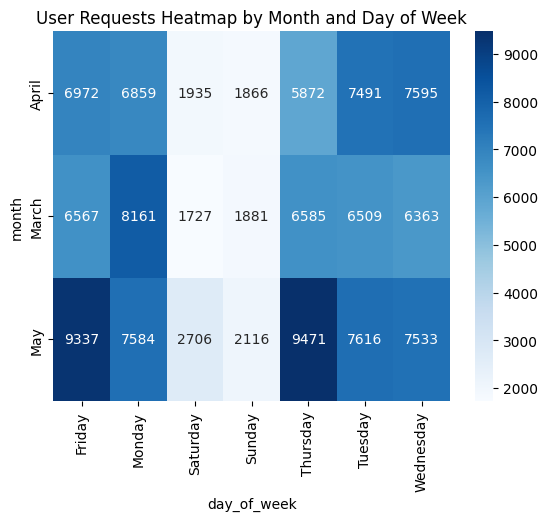

' \nThere are more user requests during working days than on weekends.\nThe peak of activity is observed in May.\n'

In [44]:
heat = df.groupby(['month', 'day_of_week'])['uuid'].count().unstack()
sns.heatmap(heat, cmap='Blues', annot=True, fmt='d')
plt.title("User Requests Heatmap by Month and Day of Week")
plt.show()

""" 
There are more user requests during working days than on weekends.
The peak of activity is observed in May.
"""

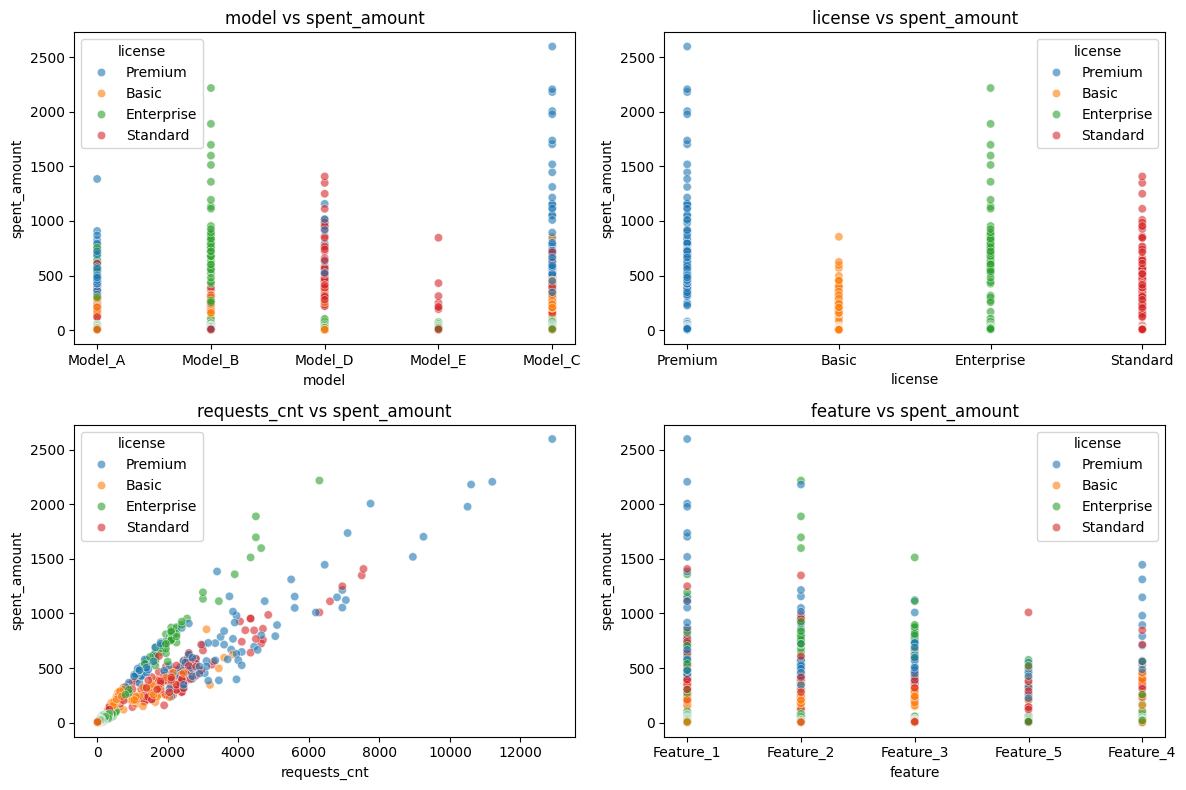

' \nrelationships between models, licenses, and features with key metrics like requests_cnt and spent_amount.\n'

In [13]:
df_key_metrics = df[["model", "license", "feature", "requests_cnt", "spent_amount"]]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()

vars_to_plot = ["model", "license", "requests_cnt", "feature"]

for i, var in enumerate(vars_to_plot):
    sns.scatterplot(
        x=var,
        y="spent_amount",
        data=df_key_metrics,
        ax=ax[i],
        hue="license",
        alpha=0.6
    )
    ax[i].set_title(f"{var} vs spent_amount")

plt.tight_layout()
plt.show()

""" 
relationships between models, licenses, and features with key metrics like requests_cnt and spent_amount.
"""

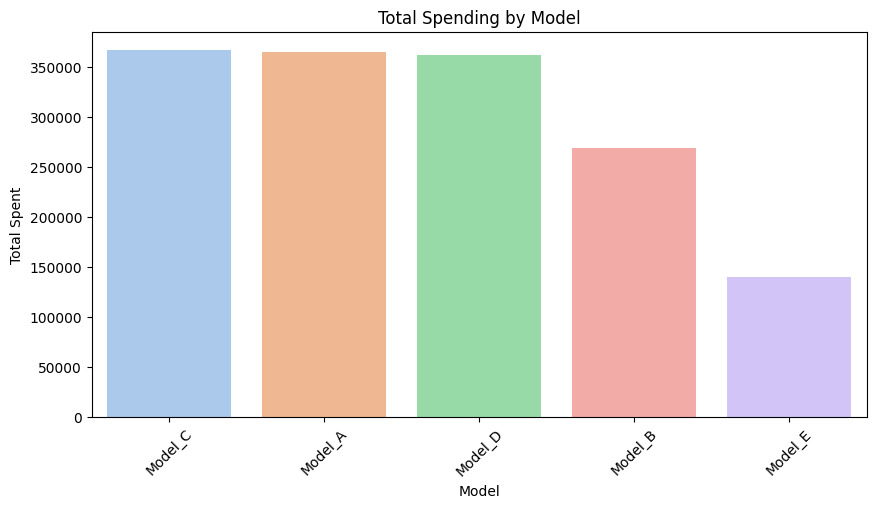

In [27]:
model_stats = (
    df.groupby('model')
      .agg(
          avg_requests=('requests_cnt', 'mean'),
          avg_spent=('spent_amount', 'mean'),
          total_requests=('requests_cnt', 'sum'),
          total_spent=('spent_amount', 'sum')
      )
      .sort_values('total_spent', ascending=False)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=model_stats.index, y=model_stats['total_spent'], palette="pastel")

plt.title("Total Spending by Model")
plt.xlabel("Model")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()